Import necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Download the heart dataset and assign it to a variable.

In [6]:
heart_data = pd.read_csv('C:/Users/emily/Desktop/Data_science/heart.csv')

What is the data type of each column?

In [7]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

See the first ten entries.

In [8]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


See the last ten entries.

In [9]:
heart_data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Check the number of observations in the dataset.

In [10]:
heart_data.shape[0]

303

Check the number of columns in the dataset.

In [11]:
heart_data.shape[1]

14

Print the name of all the columns.

In [12]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Check how the dataset is indexed?

In [13]:
heart_data.index

RangeIndex(start=0, stop=303, step=1)

What is the data structure of the columns?

In [14]:
type(heart_data['age'])

pandas.core.series.Series

In [15]:
type(heart_data['sex'])

pandas.core.series.Series

Summarize the dataframe.

In [16]:
heart_data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      1

What is the mean age of surveyed?

In [17]:
round(heart_data.age.mean())

54

What is the age with least occurrence?

In [18]:
heart_data.age.value_counts().tail()

37    2
77    1
76    1
74    1
29    1
Name: age, dtype: int64

Which sex is more popular in this dataset?

In [19]:
heart_data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

Are there any null values?

In [20]:
heart_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [21]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Check outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A57F27A940>,
      dtype=object)

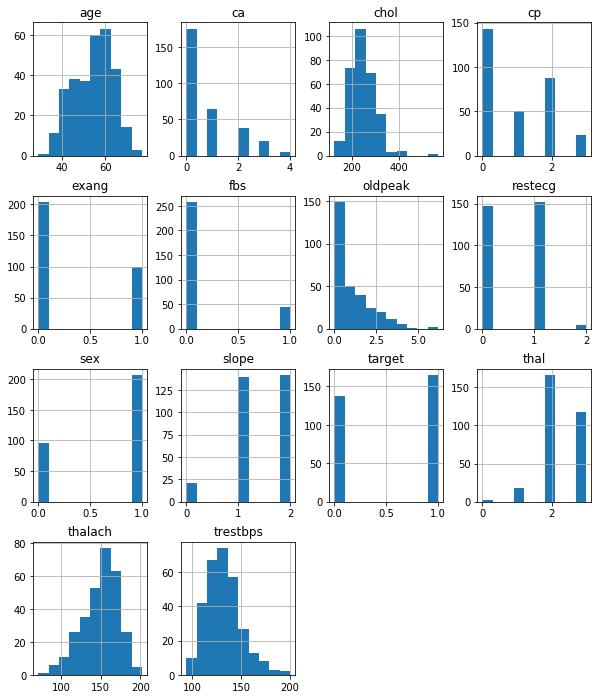

In [22]:
heart_data.hist(figsize= (10,12))

* Some conclusions based on viewing the histograms=
* The mean age is around 60.
* There are twice as many males than females.
* Most features are Categorical. Age, Chol, Oldpeak(st depression), Thalach (Max rate), Trestbps (Rest BP) are numerical.

Check outliers

In [24]:
heart_data = heart_data.drop_duplicates()
i = heart_data[heart_data['oldpeak'] > 5].index
heart_data = heart_data.drop(i)

In [25]:
j = heart_data[heart_data['chol'] > 450].index
heart_data = heart_data.drop(j)

# PCA #
Extract the last column (outcome).

In [30]:
class_label = pd.DataFrame(heart_data.iloc[:,-1])
class_label.columns = ['label']
df = heart_data.iloc[:, :-1]

In [31]:
df.head(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


Normailize data for PCA.

In [32]:
df = heart_data.sub(heart_data.mean(axis=0), axis=1)

Find covarience.

In [33]:
df_mat = np.asmatrix(df)
sigma = np.cov(df_mat.T)

Find eigen values and vectors.

In [34]:
eigVals, eigVec = np.linalg.eig(sigma)

Sort.

In [35]:
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]

Select top values and vectors.

In [36]:
eigVec = eigVec[:,:2]

Form new reduced dataset.

In [37]:
transformed = df_mat.dot(eigVec)

Form new dataframe.

In [38]:
#horizontally stack transformed data set with class label.
final_df = np.hstack((transformed, class_label))
#convert the numpy array to data frame
final_df = pd.DataFrame(final_df)
#define the column names
final_df.columns = ['x','y','label']

Plot the data.

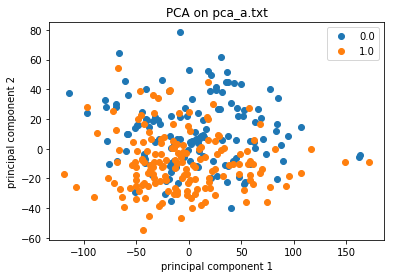

In [39]:
groups = final_df.groupby('label')
figure, axes = plt.subplots()
axes.margins(0.05)
for name, group in groups:
    axes.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
    axes.set_title("PCA on pca_a.txt")
axes.legend()
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()